In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import squarify
import matplotlib.patches as Wedge
import colorcet as cc
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.io as pio

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# publicações

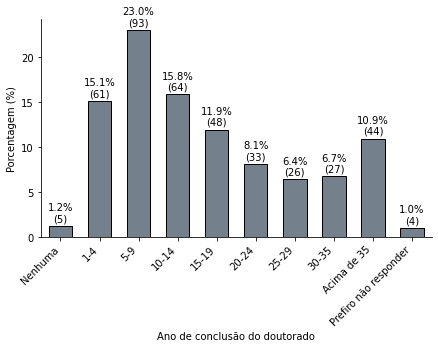

In [22]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.1_publications_peer_reviewed'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df[column_interest] = df[column_interest].replace('4/jan', '1-4')
df[column_interest] = df[column_interest].replace('14/out', '10-14')
df[column_interest] = df[column_interest].replace('11/set', '9-11')
df[column_interest] = df[column_interest].replace('9/mai', '5-9')

# Sort by 'count' or 'percentage' in descending order
df = df.sort_values(by=column_interest, ascending=True)

# Define the desired order
category_order = [
    'Nenhuma',
    '1-4',
    '5-9',
    '10-14',
    '15-19',
    '20-24',
    '25-29',
    '30-35',
    'Acima de 35',
    'Prefiro não responder'
]

# Convert the column to a categorical type with the specified order
df[column_interest] = pd.Categorical(df[column_interest], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by=column_interest)

# Creating a bar plot
plt.figure(figsize=(7, 4))
ax = sns.barplot(data=df, x=column_interest, y='percentage', 
                 width=0.6, color='slategray', edgecolor='black')
plt.xlabel('Ano de conclusão do doutorado')
plt.ylabel('Porcentagem (%)')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding labels based on the actual positions of the bars
for bar, (index, row) in zip(ax.patches, df.iterrows()):
    # Get the height of the bar for correct positioning
    height = bar.get_height()
    percentage = row['percentage']
    count = row['count']
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1.7, f'{percentage}%', 
            ha='center', color='black')
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'({count})', 
            ha='center', color='black')

plt.savefig('/Users/helenarusso/Documents/Pesquisa/JP-SBQ/Censo/Manuscrito/Figuras manuscrito/Figura 6/publicações.pdf')

plt.show()



In [23]:
df_publications = df.copy()

In [4]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.1_publications_peer_reviewed'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

In [5]:
df

,5.1_publications_peer_reviewed,count,percentage
0,9/mai,93,23.0
1,14/out,64,15.8
2,4/jan,61,15.1
3,15-19,48,11.9
4,Acima de 35,44,10.9
5,20-24,33,8.1
6,30-35,27,6.7
7,25-29,26,6.4
8,Nenhuma,5,1.2
9,Prefiro não responder,4,1.0


In [24]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.3_publications_first_author'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df[column_interest] = df[column_interest].replace('4/jan', '1-4')
df[column_interest] = df[column_interest].replace('14/out', '10-14')
df[column_interest] = df[column_interest].replace('11/set', '9-11')
df[column_interest] = df[column_interest].replace('9/mai', '5-9')

# Sort by 'count' or 'percentage' in descending order
df = df.sort_values(by=column_interest, ascending=True)

# Define the desired order
category_order = [
    'Nenhuma',
    '1-4',
    '5-9',
    '10-14',
    '15-19',
    '20-24',
    '25-29',
    '30-35',
    'Acima de 35',
    'Prefiro não responder'
]

# Convert the column to a categorical type with the specified order
df[column_interest] = pd.Categorical(df[column_interest], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by=column_interest)


In [25]:
df_1st = df.copy()

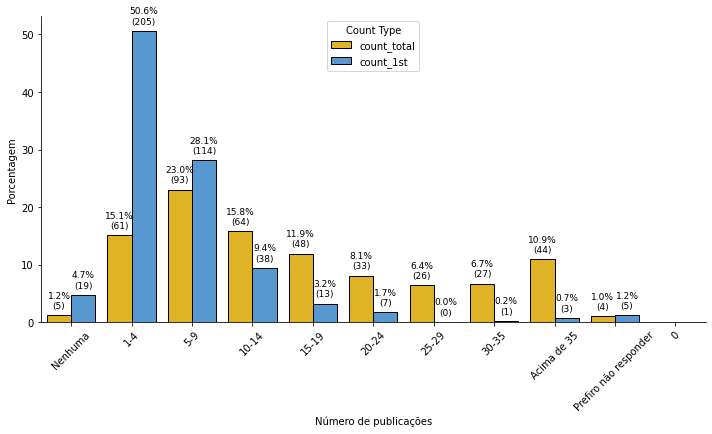

In [27]:
#rename columns
df_publications.columns = ['number_publications', 'count_total', 'percentage_total']
df_1st.columns = ['number_publications', 'count_1st', 'percentage_1st']

# # merge
df_merged = pd.merge(df_publications, df_1st, on='number_publications', how='left')

# Identify categorical columns in the DataFrame
categorical_columns = df_merged.select_dtypes(['category']).columns

# Add 0 as a category only to relevant categorical columns
for col in categorical_columns:
    df_merged[col] = df_merged[col].cat.add_categories([0])

# Now, you can fill NaN values with 0
df_merged = df_merged.fillna(0)

# Melt the DataFrame for Seaborn's format, using the specified columns
df_melted = df_merged.melt(id_vars=['number_publications'], 
                           value_vars=['count_total', 'count_1st'], 
                           var_name='Count_Type', 
                           value_name='Count')

# Add a Percentage column with correct values based on Count_Type
df_melted['Percentage'] = df_melted.apply(
    lambda row: df_merged.loc[df_merged['number_publications'] == row['number_publications'], 
                              'percentage_total' if row['Count_Type'] == 'count_total' else 'percentage_1st'].values[0],
    axis=1
)

# Define the custom color palette
custom_palette = {'count_total': '#FFC107', 'count_1st': '#449AE4'}

# Create the grouped barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='number_publications', y='Percentage', hue='Count_Type', 
                 edgecolor='black', palette=custom_palette)
plt.xlabel('Número de publicações')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)
plt.legend(title='Count Type')
plt.tight_layout()

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    if i != 10:
        height = p.get_height()
        if height >= 0:  # Display only for non-zero bars
            count = df_melted['Count'].iloc[i] if i < 10 else df_melted['Count'].iloc[i-1]
            ax.annotate(f'{height:.1f}%\n({int(count)})',  # Format to 1 decimal place
                             (p.get_x() + p.get_width() / 2, height),
                             ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                         textcoords='offset points')
            
            
# plt.savefig('/.../Figure_7a.pdf')

plt.show()


# índice H

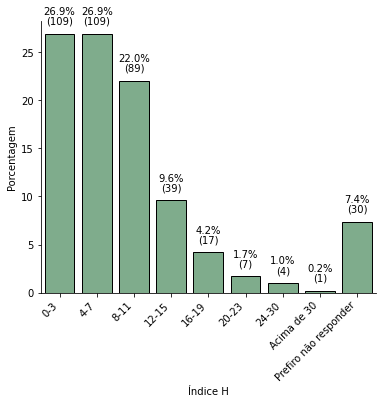

In [39]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.7_H_index_scopus'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df[column_interest] = df[column_interest].replace('7/abr', '4-7')
df[column_interest] = df[column_interest].replace('11/ago', '8-11')
df[column_interest] = df[column_interest].replace('15/dez', '12-15')

# Define the desired order
category_order = [
    '0-3',
    '4-7',
    '8-11',
    '12-15',
    '16-19',
    '20-23',
    '24-30',
    'Acima de 30',
    'Prefiro não responder'
]

# Convert the column to a categorical type with the specified order
df[column_interest] = pd.Categorical(df[column_interest], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by=column_interest).reset_index()

# Creating a bar plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(data=df, x=column_interest, y='percentage', color='#78B389', edgecolor='black')
plt.xlabel('Índice H')
plt.ylabel('Porcentagem')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 2, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_7b.pdf')

plt.show()


# autor correspondência

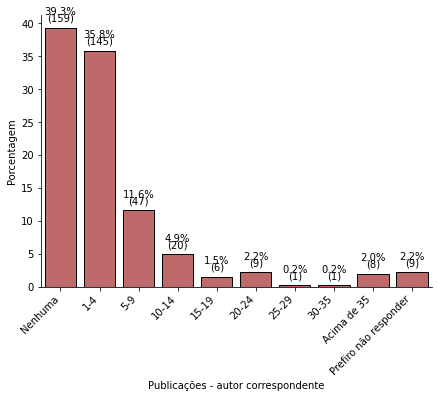

In [67]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.4_publications_corresponding_author'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df[column_interest] = df[column_interest].replace('4/jan', '1-4')
df[column_interest] = df[column_interest].replace('9/mai', '5-9')
df[column_interest] = df[column_interest].replace('14/out', '10-14')

# Define the desired order
category_order = [
    'Nenhuma',
    '1-4',
    '5-9',
    '10-14',
    '15-19',
    '20-24',
    '25-29',
    '30-35',
    'Acima de 35',
    'Prefiro não responder'
]

# Convert the column to a categorical type with the specified order
df[column_interest] = pd.Categorical(df[column_interest], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by=column_interest).reset_index()

# Creating a bar plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=df, x=column_interest, y='percentage', color='indianred', edgecolor='black')
plt.xlabel('Publicações - autor correspondente')
plt.ylabel('Porcentagem')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 2, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_7c.pdf')

plt.show()


# Colaborações internacionais

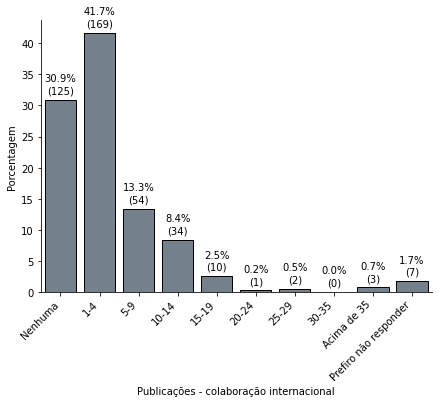

In [74]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.5_international_collaborations'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df[column_interest] = df[column_interest].replace('4/jan', '1-4')
df[column_interest] = df[column_interest].replace('9/mai', '5-9')
df[column_interest] = df[column_interest].replace('14/out', '10-14')

# Add the new row with specific values
new_row = {
    "5.5_international_collaborations": "30-35",
    "count": 0,
    "percentage": 0.0
}

# Add the new row to the DataFrame
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Define the desired order
category_order = [
    'Nenhuma',
    '1-4',
    '5-9',
    '10-14',
    '15-19',
    '20-24',
    '25-29',
    '30-35',
    'Acima de 35',
    'Prefiro não responder'
]

# Convert the column to a categorical type with the specified order
df[column_interest] = pd.Categorical(df[column_interest], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by=column_interest).reset_index()

# Creating a bar plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=df, x=column_interest, y='percentage', color='slategray', edgecolor='black')
plt.xlabel('Publicações - colaboração internacional')
plt.ylabel('Porcentagem')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 3, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_7d.pdf')

plt.show()

# patentes

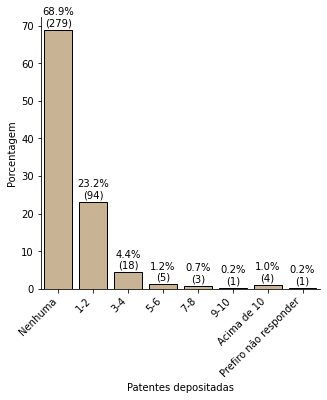

In [84]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.6_patents_deposited'

total = pd.DataFrame(df[column_interest].fillna('N/A'))
total = total[total[column_interest] != 'N/A'][[column_interest]]
total = len(total)

# Split the column of interest by semicolon and expand each unique response into a new row
df = df[column_interest].str.split(';', expand=True).stack().reset_index(level=1, drop=True)

# Create a new DataFrame with counts of each unique response
df = df.value_counts().reset_index()
df.columns = [column_interest, 'count']  # Renaming columns for clarity

# Add a new column for the percentage
df['percentage'] = ((df['count'] / total * 100).round(1))

df[column_interest] = df[column_interest].replace('2/jan', '1-2')
df[column_interest] = df[column_interest].replace('4/mar', '3-4')
df[column_interest] = df[column_interest].replace('6/mai', '5-6')
df[column_interest] = df[column_interest].replace('8/jul', '7-8')
df[column_interest] = df[column_interest].replace('10/set', '9-10')

# Define the desired order
category_order = [
    'Nenhuma',
    '1-2',
    '3-4',
    '5-6',
    '7-8',
    '9-10',
    'Acima de 10',
    'Prefiro não responder'
]

# Convert the column to a categorical type with the specified order
df[column_interest] = pd.Categorical(df[column_interest], categories=category_order, ordered=True)

# Sort the DataFrame based on the new categorical order
df = df.sort_values(by=column_interest).reset_index()

# Creating a bar plot
plt.figure(figsize=(5, 5))
ax = sns.barplot(data=df, x=column_interest, y='percentage', color='tan', edgecolor='black')
plt.xlabel('Patentes depositadas')
plt.ylabel('Porcentagem')

# Customize plot appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding percentage and count labels above each bar
for i, row in df.iterrows():
    percentage = row['percentage']
    count = row['count']
    ax.text(i, percentage + 4, f'{percentage}%', ha='center', color='black')      # Count label    
    ax.text(i, percentage + 1, f'({count})', ha='center', color='black')  # Percentage label

# plt.savefig('/.../Figure_7e.pdf')
    
plt.show()


# Patentes por área

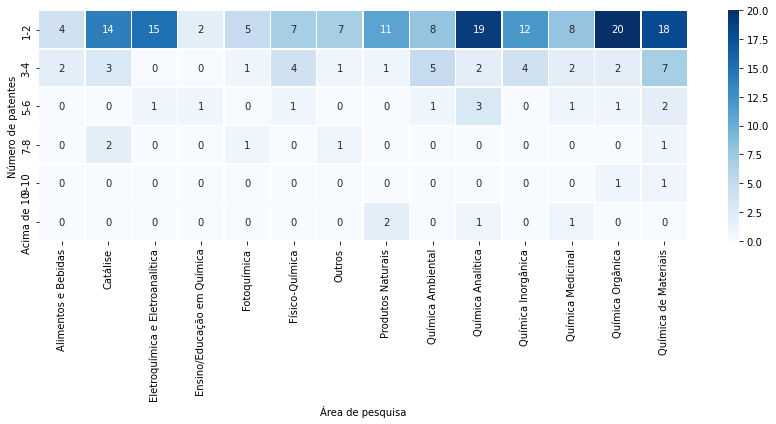

In [117]:
# Load and process data
df = pd.read_csv('Results_clear.txt', sep='\t')
column_interest = '5.6_patents_deposited'

#keep only columns of interest
df = df[[column_interest, '1.5_research_subarea']]

# Remove rows where column_interest has NaN values
df = df.dropna(subset=[column_interest])

# Remove rows where column_interest is 'Nenhuma' or ''Prefiro não responder''
df = df[df[column_interest] != "Nenhuma"]
df = df[df[column_interest] != "Prefiro não responder"]

df[column_interest] = df[column_interest].replace('2/jan', '1-2')
df[column_interest] = df[column_interest].replace('4/mar', '3-4')
df[column_interest] = df[column_interest].replace('6/mai', '5-6')
df[column_interest] = df[column_interest].replace('8/jul', '7-8')
df[column_interest] = df[column_interest].replace('10/set', '9-10')

# Split the '1.5_research_subarea' column into individual areas with their patent ranges
df = df.set_index('5.6_patents_deposited')['1.5_research_subarea'].str.split(';', expand=True).stack().reset_index()

# Rename columns for clarity
df.columns = ['Patent Range', 'Index', 'Research Subarea']

# Group data by research subarea and patent range, and count occurrences
heatmap_data = df.groupby(['Research Subarea', 'Patent Range']).size().unstack(fill_value=0)

heatmap_data = heatmap_data.T

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, linecolor='white')
plt.xlabel("Área de pesquisa")
plt.ylabel("Número de patentes")
plt.tight_layout()

# plt.savefig('/.../Figure_7f.pdf')

plt.show()
